# K Mean Clustering

Objective: Iris Flower clustering  
Dataset: iris.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('iris.csv')
print(data.shape)
data.head()

(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Name, dtype: int64


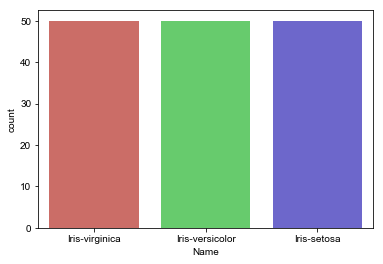

In [2]:
print(data['Name'].value_counts())

sns.countplot(x='Name',data = data, palette='hls',order = data['Name'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [3]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

## Drop Column

In [4]:
data.drop(['Name'],axis=1,inplace=True)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Correlation

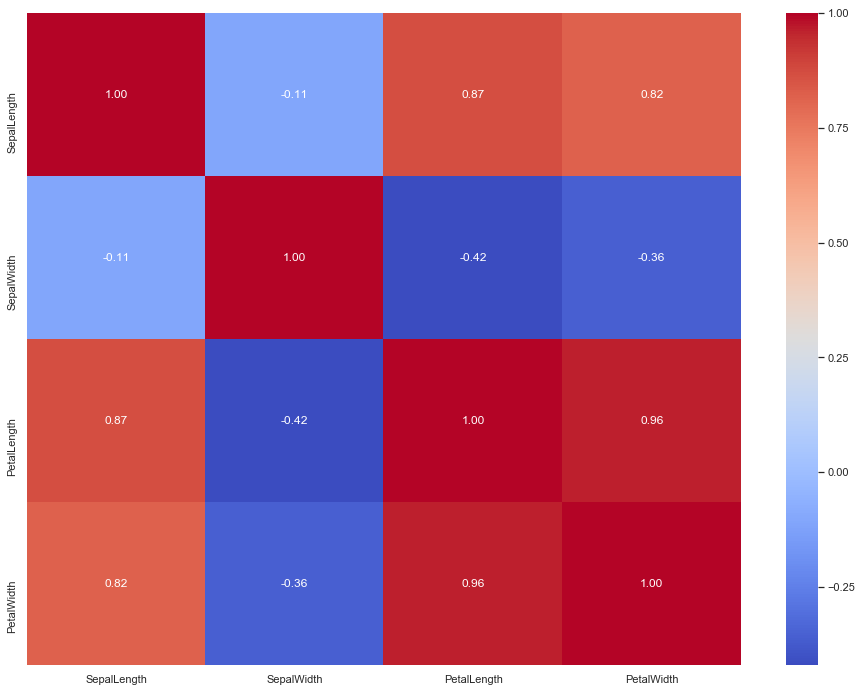

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Standardization

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (150, 4)


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667]])

## Find the Best K

In [7]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[41.138172022977756, 12.14368828157972, 6.998114004826761, 5.532831003081898, 4.571180508755745, 3.9158006119711084, 3.4692585948935317, 3.1303248579870027, 2.8152490163882877, 2.5188936306430323, 2.277878202642009, 2.1264560560210404, 2.037833592946502, 1.9357751132560241]


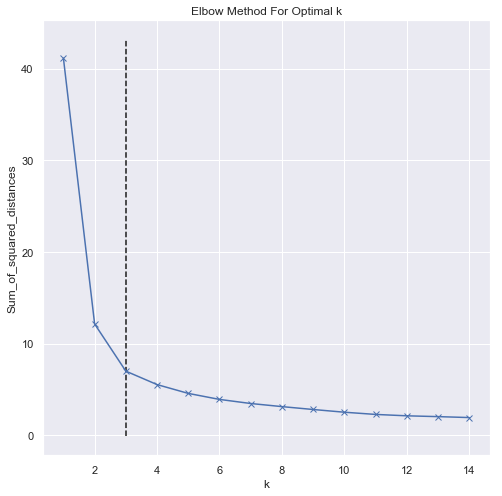

The best k: 3


In [8]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [9]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (150,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Assign Labels Cluster to Dataframe

In [10]:
data["KM_Cluster"] = labels
data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,KM_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Cluster 2D Visualization

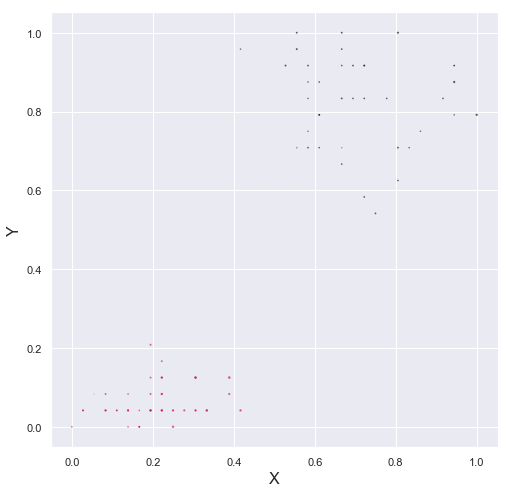

In [11]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

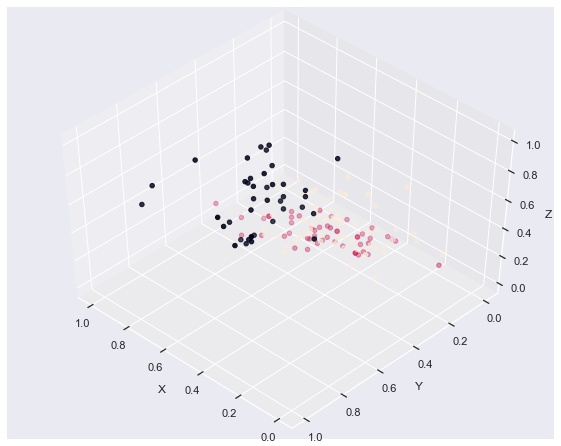

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

2    61
1    50
0    39
Name: KM_Cluster, dtype: int64


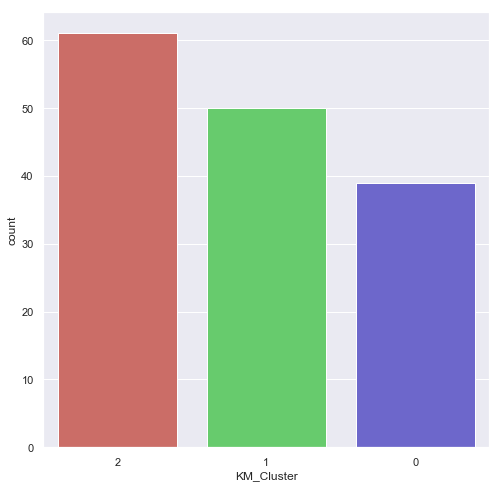

In [13]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [14]:
data[data['KM_Cluster']== 0].head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,KM_Cluster
50,7.0,3.2,4.7,1.4,0
52,6.9,3.1,4.9,1.5,0
77,6.7,3.0,5.0,1.7,0
100,6.3,3.3,6.0,2.5,0
102,7.1,3.0,5.9,2.1,0
103,6.3,2.9,5.6,1.8,0
104,6.5,3.0,5.8,2.2,0
105,7.6,3.0,6.6,2.1,0
107,7.3,2.9,6.3,1.8,0
108,6.7,2.5,5.8,1.8,0
